In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [9]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(ride_data, city_data,on='city')
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [10]:
# Obtain the x and y coordinates for each of the three city types |average fare($)| Total NUmber of Riders (Per City)
unique_driver_count_df = combined_df.drop(["date", "fare","ride_id"], axis=1)
unique_driver_count_df = unique_driver_count_df.drop_duplicates(subset="city", keep= 'first', inplace=False)

In [25]:
s_urban_df = unique_driver_count_df.loc[combined_df['type'] == "Urban"]
urban_s= s_urban_df.groupby(["city"]).mean()['driver_count']
s_suburban_df = unique_driver_count_df.loc[combined_df['type'] == "Suburban"]
suburban_s= s_suburban_df.groupby(["city"]).mean()['driver_count']
s_rural_df = unique_driver_count_df.loc[combined_df['type'] == "Rural"]
rural_s = s_rural_df.groupby(["city"]).mean()['driver_count']
rural_s
# urban_s = pd.DataFrame(s_urban_df["driver_count"])
# suburban_s = pd.DataFrame(s_suburban_df["driver_count"])
# rural_s = pd.DataFrame(s_rural_df[["driver_count"]])
# rural_s

city
Bradshawfurt         7
Garzaport            7
Harringtonfort       4
Jessicaport          1
Lake Jamie           4
Lake Latoyabury      2
Michaelberg          6
New Ryantown         2
Newtonview           1
North Holly          8
North Jaime          1
Penaborough          6
Randallchester       9
South Jennifer       7
South Marychester    1
South Saramouth      7
Taylorhaven          1
West Heather         4
Name: driver_count, dtype: int64

In [26]:
urban_df = combined_df.loc[combined_df['type'] == "Urban"]
urban_df.describe();
urban_grouped_df = urban_df.groupby("city")
urban_x = urban_grouped_df["ride_id"].count()
urban_x.head()
urban_y = pd.DataFrame(urban_grouped_df["fare"].mean()).round()
urban_y.head();

In [27]:
suburban_df = combined_df.loc[combined_df['type'] == "Suburban"]
suburban_df.describe();
suburban_grouped_df = suburban_df.groupby("city")
suburban_x = suburban_grouped_df["ride_id"].count()
suburban_x.head()
suburban_y = pd.DataFrame(suburban_grouped_df["fare"].mean()).round()
suburban_y.head();
# suburban_s =

In [23]:
rural_df = combined_df.loc[combined_df['type'] == "Rural"]
rural_df.describe();
rural_df.describe();
rural_grouped_df = rural_df.groupby("city")
rural_x = rural_grouped_df["ride_id"].count()
rural_x.head()
rural_y = pd.DataFrame(rural_grouped_df["fare"].mean()).round()
rural_y.head();
# rural_s = 

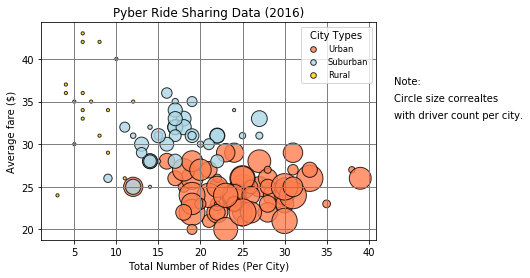

In [24]:
plt.scatter(urban_x, urban_y, s = urban_s*10, c = "coral", marker = "o", alpha = 0.8, edgecolors = "black", label = "Urban")
plt.scatter(suburban_x, suburban_y, s = suburban_s*10 , c = "lightblue", marker = "o", alpha = 0.8, edgecolors = "black", label = "Suburban")
plt.scatter(rural_x, rural_y, s = rural_s*10 , c = "gold", marker = "o", alpha = 0.8, edgecolors = "black", label = "Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare ($)")
plt.grid(color = "grey", linestyle = "-", linewidth = 1)

lgnd = plt.legend(title = "City Types", fontsize = "small", fancybox = True)
lgnd.legendHandles[0]._sizes = [32]
lgnd.legendHandles[1]._sizes = [32]
lgnd.legendHandles[2]._sizes = [32]

plt.text(43,37, "Note:")
plt.text(43,35, "Circle size correaltes")
plt.text(43,33, "with driver count per city.")
plt.savefig("bubble.png")
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents
pie_df = combined_df.groupby("type").sum()
totals_df = pd.DataFrame(pie_df["fare"])
totals_df["fare"]
totals_df["percentage"]= totals_df["fare"] /totals_df["fare"].sum()
totals_df

In [ ]:
# Labels 
labels = ["Rural", "Suburban", "Urban"]

# Values
sizes = [4304.93, 19356.33, 39854.38 ]
# The colors of each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

explode = (0, 0, 0.1)

plt.pie(sizes, labels=labels, explode = explode, autopct="%1.1f%%", colors=colors, shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("Fare pie.png")
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Type Percents
r_pie_df = combined_df.groupby("type").count()
total_rides = r_pie_df["fare"].sum()
r_pie_df["percentage"]= r_pie_df["fare"] /total_rides
r_pie_df

In [ ]:

labels = ["Rural", "Suburban", "Urban"]
sizes = [0.052632, 0.263158, 0.684211]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, labels=labels, explode = explode, autopct="%1.1f%%", colors=colors, shadow=True, startangle=140)
# Save Figure
plt.title("% of Total Rides by City Type")
plt.axis("equal")
# Save Figure
plt.savefig("rides pie.png")
plt.show()

## Total Drivers by City Type

In [ ]:
unique_driver_count_df = combined_df.drop(["date", "fare","ride_id"], axis=1)
unique_driver_count_df = unique_driver_count_df.drop_duplicates(subset="city", keep= 'first', inplace=False)


u_urban_df = unique_driver_count_df.loc[combined_df['type'] == "Urban"]
u_driver_df = u_urban_df.groupby("type").sum()

su_suburban_df = unique_driver_count_df.loc[combined_df['type'] == "Suburban"]
su_driver_df = su_suburban_df.groupby("type").sum()

r_rural_df = unique_driver_count_df.loc[combined_df['type'] == "Rural"]
r_driver_df = r_rural_df.groupby("type").sum()



In [ ]:
# u_driver_df,su_driver_df,r_driver_df

labels = ["Rural", "Suburban", "Urban"]
sizes = [78, 490, 2405]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, labels=labels, explode = explode, autopct="%1.1f%%", colors=colors, shadow=True, startangle=140)
# Save Figure
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("drivers pie.png")
plt.show()